# 🎄 [Day 3](https://adventofcode.com/2019/day/3)

In [1]:
from collections import defaultdict

x_increment = {'R': 1, 'L': -1, 'U': 0, 'D': 0}
y_increment = {'R': 0, 'L': 0, 'U': -1, 'D': +1}

def map_wire(wire, with_steps=False):    
    """Given a wire description, return a dictionary of 2D positions 
    which are traversed by the wire"""
    global x_increment, y_increment
    x, y = 0, 0
    num_steps = 0
    default = float('inf') if with_steps else False
    indices = defaultdict(lambda: defaultdict(lambda: False))
    for path in wire:
        d, steps = path[0], int(path[1:])
        for i in range(steps):
            x += x_increment[d]
            y += y_increment[d]
            if not indices[x][y]:
                indices[x][y] = num_steps + i + 1 if with_steps else True
        num_steps += steps
    return indices

def get_intersection(wire1, wire2):
    """Returns the distance to the closest intersection (in Manhattan distance)
    between the two inputs wires"""
    global x_increment, y_increment
    indices = map_wire(wire1)
    x, y = 0, 0
    closest = float('inf')
    for path in wire2:
        d, steps = path[0], int(path[1:])
        for i in range(steps):
            x += x_increment[d]
            y += y_increment[d]            
            if indices[x][y]:
                closest = min(closest, abs(x) + abs(y))
    return closest

def get_delay(wire1, wire2):
    """Returns the minimum signal delay"""
    indices = map_wire(wire1, with_steps=True)
    x, y = 0, 0
    num_steps = 0
    closest = float('inf')
    for path in wire2:
        d, steps = path[0], int(path[1:])
        for i in range(steps):
            x += x_increment[d]
            y += y_increment[d]            
            if indices[x][y]:
                closest = min(closest, indices[x][y] + num_steps + i + 1)
        num_steps += steps
    return closest

In [2]:
with open("inputs/day3.txt", 'r') as f:
    inputs = [x.split(',') for x in f.read().splitlines()]
        
print('Distance to the closest intersection:', get_intersection(*inputs))
print('Minimum signal delay:', get_delay(*inputs))

Distance to the closest intersection: 399
Minimum signal delay: 15678


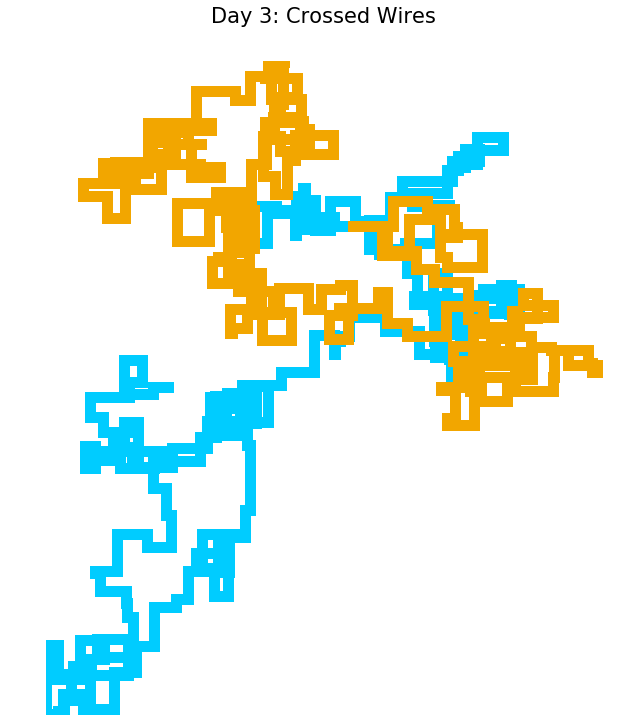

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.sparse import lil_matrix as sparse_matrix


def plot_wires(wires):  
    # Determine bounds
    bounds = [0, 0, 0, 0]
    for wire in wires:
        x, y = 0, 0
        for path in wire:
            d, steps = path[0], int(path[1:])
            if d == 'R':
                x += steps
                bounds[1] = max(bounds[1], x)
            elif d == 'L':
                x -= steps
                bounds[0] = min(bounds[0], x)
            elif d == 'U':
                y -= steps
                bounds[2] = min(bounds[2], y)
            elif d == 'D':
                y += steps
                bounds[3] = max(bounds[3], y)
                
    # Draw sparse matrix
    plt.figure(figsize=(12, 12)) 
    colors = [(0.95, 0.65, 0), (0, 0.8, 1)]
    canvas = sparse_matrix((bounds[3] - bounds[2] + 1, bounds[1] - bounds[0] + 1))
    for i, wire in enumerate(wires):
        x, y = 0, 0
        for path in wire:
            d, steps = path[0], int(path[1:])
            if d == 'R':
                canvas[y - bounds[2], x - bounds[0]:x - bounds[0] + steps + 1] = 1
                x += steps
            elif d == 'L':
                canvas[y - bounds[2], x - bounds[0] - steps:x - bounds[0] + 1] = 1
                x -= steps
            elif d == 'U':
                canvas[y - bounds[2] - steps:y - bounds[2] + 1, x - bounds[0]] = 1
                y -= steps
            elif d == 'D':
                canvas[y - bounds[2]:y - bounds[2] + steps + 1, x - bounds[0]] = 1
                y += steps
        plt.spy(canvas, color=colors[i], zorder=-i, linewidth=0.1)
    plt.title("Day 3: Crossed Wires", fontsize=21)
    plt.axis("off")
    plt.show()
    
        
plot_wires(inputs)